In [47]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from easydict import EasyDict as edict

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Automatically created module for IPython interactive environment


In [46]:
def label2onehot(labels):
    one_hot_labels = np.zeros((labels.size, 2))
    one_hot_labels[np.arange(labels.size), labels] = 1
    return one_hot_labels

In [49]:
nepal = edict(np.load('../src/nepal_scores.npy', allow_pickle=True).item())

In [53]:
one_hot_labels = label2onehot(np.array(nepal.labels))

In [57]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(one_hot_labels[:, i], nepal.scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [71]:
fpr["micro"], tpr["micro"], _ = roc_curve(one_hot_labels.ravel(), nepal.scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

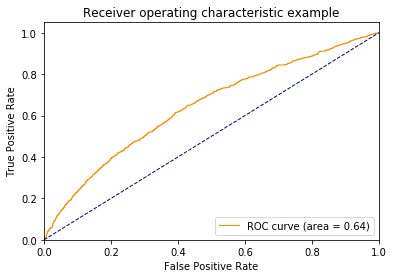

In [80]:
plt.figure()
lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [72]:
roc_auc

{0: 0.6420182815278757, 1: 0.6420340139742392, 'micro': 0.8734715367439065}

In [66]:
y_scores = [s[l] for s, l in zip(nepal.scores, nepal.labels)]

In [68]:
np.mean(y_scores)

0.8253567

In [69]:
roc_auc_score(nepal.labels, nepal.scores[:, 1])

0.6420340139742392

In [70]:
len(nepal.labels)

5872